<a href="https://colab.research.google.com/github/ShubhamPrakash108/ICDEC_2024_Challenge_Vehicle_Detection_in_Various_Weather_Conditions-VDVWC-/blob/main/Final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to my notebook. In this notebook I am going to make the model with best parameter possible.

In [ ]:
#importing the data to colab notebook
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhamprakash108/dataset

Dataset URL: https://www.kaggle.com/datasets/shubhamprakash108/dataset
License(s): unknown
 99% 541M/547M [00:07<00:00, 91.9MB/s]
100% 547M/547M [00:07<00:00, 72.4MB/s]


In [ ]:
#Unzipping the data folder
import zipfile
import os

zip_file_path = '/content/dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()


Visualizing the random images and it's annotation.

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define paths
image_folder = '/content/Dataset folder/train/images'
label_folder = '/content/Dataset folder/train/labels'

# Get list of images and labels
images = os.listdir(image_folder)
labels = os.listdir(label_folder)



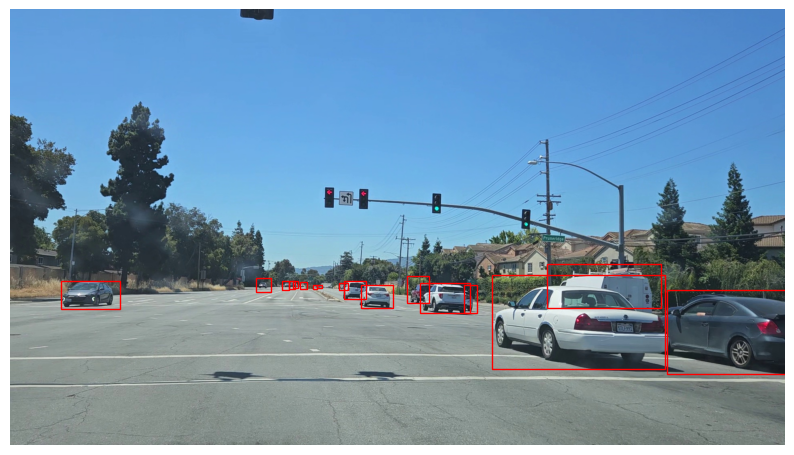

In [ ]:
# Choose a random image
random_image = random.choice(images)
image_path = os.path.join(image_folder, random_image)

# Corresponding label file
label_file = random_image.replace('.jpg', '.txt')
label_path = os.path.join(label_folder, label_file)

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the labels
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Plot the bounding boxes
for label in label_data:
    label = label.strip().split()
    class_id, x_center, y_center, width, height = map(float, label)

    # Convert YOLO format to bounding box coordinates
    img_height, img_width, _ = image.shape
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = int(x_center - width / 2)
    x_max = int(x_center + width / 2)
    y_min = int(y_center - height / 2)
    y_max = int(y_center + height / 2)

    # Draw rectangle
    rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

Creating .yaml file.

In [ ]:
dataset_yaml = """
train: /content/Dataset folder/train/images
val: /content/Dataset folder/val/images
nc: 15  # number of classes
names: ['car','bike','auto','rickshaw','cycle','bus','minitruck','truck','van','taxi','motorvan','toto','train','boat','cycle van']  # class names
"""


with open('/content/Dataset folder/dataset.yaml', 'w') as file:
    file.write(dataset_yaml)


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/78.2 GB disk)


In [ ]:
import torch
from ultralytics import YOLO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_train = YOLO('yolov8n.yaml').to(device)
data_yaml_path = "/content/Dataset folder/dataset.yaml"
model_train.train(data=data_yaml_path, epochs=50, imgsz=640, device=device,lr0= 0.00909,
lrf= 0.01,
momentum= 0.94526,
weight_decay= 0.0005,
warmup_epochs= 3.20586,
warmup_momentum= 0.70057,
box= 5.88151,
cls= 0.55694,
dfl= 1.41938,
hsv_h= 0.01383,
hsv_s= 0.74796,
hsv_v= 0.42644,
degrees= 0.0,
translate= 0.11281,
scale= 0.44675,
shear= 0.0,
perspective= 0.0,
flipud= 0.0,
fliplr= 0.4923,
bgr= 0.0,
mosaic= 1.0,
mixup= 0.0,
copy_paste= 0.0)


engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Dataset folder/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=Fals

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 125MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/Dataset folder/train/labels... 2600 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2600/2600 [00:05<00:00, 434.63it/s]

train: WARNING ⚠️ /content/Dataset folder/train/images/rainy day (236).jpg: 1 duplicate labels removed
train: New cache created: /content/Dataset folder/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Dataset folder/val/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 386.06it/s]

val: New cache created: /content/Dataset folder/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.00909' and 'momentum=0.94526' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.81G      3.076      5.721       3.89         53        640: 100%|██████████| 163/163 [01:32<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:05<00:10,  2.13s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]

                   all        200       1199   0.000228    0.00619   0.000124   4.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.56G      2.681      4.702      3.091         93        640: 100%|██████████| 163/163 [01:24<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        200       1199     0.0016     0.0497    0.00105   0.000278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.35G       2.43      4.042      2.575         71        640: 100%|██████████| 163/163 [01:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200       1199      0.724    0.00902    0.00714    0.00204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.47G      2.203      3.484      2.252         91        640: 100%|██████████| 163/163 [01:19<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        200       1199       0.83     0.0291     0.0245    0.00763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.43G       2.06      3.145      2.055        124        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        200       1199      0.787     0.0889     0.0711     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.55G      1.976      2.898      1.942         92        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


                   all        200       1199      0.682     0.0631     0.0606     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.47G      1.911      2.721      1.864         82        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]


                   all        200       1199      0.501     0.0855     0.0712     0.0238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.33G      1.856      2.611      1.814         88        640: 100%|██████████| 163/163 [01:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


                   all        200       1199       0.81     0.0859      0.078     0.0288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.43G      1.816      2.491      1.763         84        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]

                   all        200       1199      0.711     0.0902      0.105     0.0408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.56G      1.792      2.366      1.734         91        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all        200       1199       0.86     0.0956      0.119     0.0445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.55G      1.767      2.301      1.696         92        640: 100%|██████████| 163/163 [01:24<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200       1199      0.738     0.0888       0.12     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.33G      1.732      2.214       1.67         52        640: 100%|██████████| 163/163 [01:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]


                   all        200       1199      0.129      0.186      0.137      0.051

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.55G      1.718      2.136      1.643         70        640: 100%|██████████| 163/163 [01:26<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


                   all        200       1199      0.283      0.194      0.152     0.0606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.4G      1.696       2.09      1.636        101        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


                   all        200       1199      0.439      0.185      0.173     0.0745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.5G      1.683      2.035      1.614        119        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        200       1199      0.448      0.134      0.142     0.0477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.34G      1.667      1.991      1.607        135        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        200       1199      0.264       0.18      0.183     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.32G      1.654      1.935      1.577         71        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        200       1199      0.294      0.208       0.22     0.0853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.63G      1.637      1.896      1.561        101        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]


                   all        200       1199      0.161      0.179      0.168     0.0674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.56G      1.624      1.868      1.561         53        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        200       1199      0.332      0.171       0.19     0.0833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.33G      1.609      1.809       1.54        106        640: 100%|██████████| 163/163 [01:25<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        200       1199      0.478      0.162      0.218     0.0936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.46G      1.603       1.78      1.532         73        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]


                   all        200       1199      0.576      0.167      0.202     0.0817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.34G      1.595      1.748       1.52         82        640: 100%|██████████| 163/163 [01:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        200       1199      0.327      0.235      0.234     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.31G      1.582      1.726      1.515         87        640: 100%|██████████| 163/163 [01:20<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        200       1199      0.392      0.232      0.239      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.46G      1.575      1.706      1.505        108        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]


                   all        200       1199       0.32      0.259      0.244      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.47G      1.567       1.68      1.503        124        640: 100%|██████████| 163/163 [01:23<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


                   all        200       1199      0.443       0.16       0.22     0.0926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.34G       1.56      1.651      1.492         81        640: 100%|██████████| 163/163 [01:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]


                   all        200       1199      0.339      0.245      0.274      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.45G       1.54      1.631      1.474         78        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]


                   all        200       1199      0.269      0.234      0.236      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.47G      1.545      1.605      1.475         99        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]


                   all        200       1199      0.686       0.17      0.225     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.42G      1.529      1.587      1.463         78        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        200       1199      0.568      0.185      0.222     0.0918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.69G      1.526      1.571      1.459         62        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        200       1199      0.265      0.239      0.243      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.38G      1.522      1.563      1.461        123        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


                   all        200       1199      0.229      0.282      0.246      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.37G      1.516      1.541      1.452        157        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        200       1199      0.329      0.249      0.264      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.44G      1.506      1.531      1.444         65        640: 100%|██████████| 163/163 [01:22<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]

                   all        200       1199      0.446      0.219      0.242      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.49G      1.505      1.503      1.436        134        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.11it/s]

                   all        200       1199      0.589      0.191      0.258      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.4G      1.494      1.489      1.436         90        640: 100%|██████████| 163/163 [01:27<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        200       1199      0.478      0.176      0.232        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.47G      1.492      1.483      1.426         64        640: 100%|██████████| 163/163 [01:24<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        200       1199      0.554      0.226      0.278      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G      1.486      1.462      1.418         59        640: 100%|██████████| 163/163 [01:20<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]


                   all        200       1199      0.362      0.232      0.262      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G      1.479      1.446      1.417         84        640: 100%|██████████| 163/163 [01:24<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        200       1199      0.583      0.217       0.29      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.34G      1.475      1.449      1.413        119        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.22it/s]

                   all        200       1199        0.5      0.198      0.258      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.43G      1.472      1.434      1.404         53        640: 100%|██████████| 163/163 [01:27<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200       1199      0.445       0.22      0.265      0.113


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.64G      1.444      1.346      1.404         47        640: 100%|██████████| 163/163 [01:24<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        200       1199      0.472      0.195      0.254      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.27G      1.423      1.294      1.383         63        640: 100%|██████████| 163/163 [01:21<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200       1199      0.488      0.193      0.249      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.22G      1.414       1.28      1.376         39        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        200       1199       0.38      0.243      0.284      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.21G      1.412      1.268      1.378         37        640: 100%|██████████| 163/163 [01:22<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]


                   all        200       1199      0.445       0.25      0.287      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.35G      1.406      1.244       1.37         52        640: 100%|██████████| 163/163 [01:21<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        200       1199      0.463      0.202      0.243      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.33G      1.407      1.241      1.371         75        640: 100%|██████████| 163/163 [01:24<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]

                   all        200       1199      0.449      0.228      0.253      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.2G      1.397      1.236      1.362         48        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]

                   all        200       1199      0.306       0.22       0.25      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.34G      1.395      1.223      1.358         45        640: 100%|██████████| 163/163 [01:25<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]

                   all        200       1199      0.516      0.191      0.258      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.2G      1.393      1.215      1.364         35        640: 100%|██████████| 163/163 [01:19<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        200       1199      0.503      0.187      0.259      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G       1.39      1.212      1.363         88        640: 100%|██████████| 163/163 [01:23<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


                   all        200       1199        0.5      0.192      0.258      0.117

50 epochs completed in 1.247 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.35s/it]


                   all        200       1199      0.446       0.25      0.287      0.128
                   car        159        743      0.551      0.639      0.641      0.284
                  bike         99        125      0.447      0.576      0.557      0.311
                  auto         47         60      0.633       0.25       0.38      0.139
                 cycle         29         46      0.124     0.0217     0.0169    0.00618
                   bus         48         52      0.536      0.445      0.421      0.146
             minitruck         54         58      0.167      0.069     0.0774      0.027
                 truck         32         47      0.573      0.234      0.317      0.161
                   van         25         28          0          0     0.0229     0.0104
                  taxi         10         10          1      0.162      0.341      0.148
                  toto         28         30      0.426        0.1     0.0967     0.0477
Speed: 1.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc649256650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.0460

###Checking the result


0: 384x640 4 cars, 85.8ms
Speed: 1.7ms preprocess, 85.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


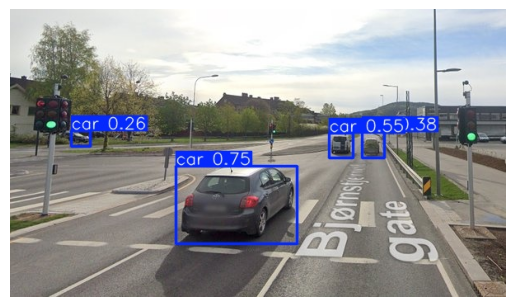

In [ ]:
results = model_train(["https://qph.cf2.quoracdn.net/main-qimg-bb51aab9fada8884fcf9b76b4ac326d5-pjlq"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result1.jpg")  # save to disk

from PIL import Image
import matplotlib.pyplot as plt

# The filename of the uploaded file
#filename = list(uploaded.keys())[0]

# Open the image file
image = Image.open("/content/result1.jpg")

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


If you want to deploy the model
Kindly visit this website: https://docs.ultralytics.com/integrations/
